In [217]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [218]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt




import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

from torchvision import transforms as T
import torchvision



from PIL import Image
import cv2
import albumentations as A

import time
import os
from tqdm.notebook import tqdm

from pathlib import Path
import tifffile as tiff

import cv2 as cv

from droneai.data import utils
from droneai.data.dataset import DroneSegmentation
from droneai.transforms import transform_pair as TP
    


In [248]:
train_tfm = TP.PairCompose([
    TP.PairResize(dim=(600,400)),
])

valid_tfm = TP.PairCompose([
    TP.PairResize(dim=(600,400)),
])

ROOT_PATH = '/data/semantic_drone/'
trainset = DroneSegmentation(root=ROOT_PATH,  mode='train', val_size=0.2, transform=train_tfm)
validset = DroneSegmentation(root=ROOT_PATH,  mode='valid', val_size=0.2, transform=valid_tfm)

In [255]:
%%time
img, mask = validset[0]

CPU times: user 692 ms, sys: 135 ms, total: 827 ms
Wall time: 514 ms


In [252]:
# mask = mask.astype(np.uint8)

In [253]:
# img, mask = com(img, mask)

Image Size (400, 600, 3)
Mask Size (400, 600)


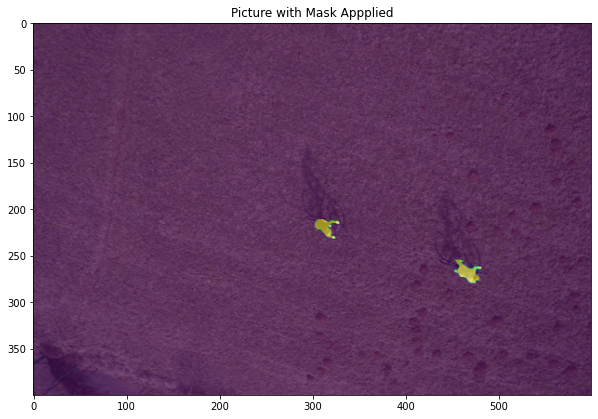

Image Size (400, 600, 3)
Mask Size (400, 600)


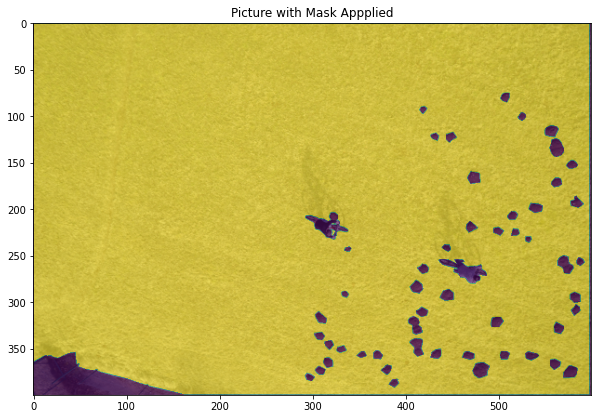

In [256]:
utils.visualize(img, mask[:,:,15])
utils.visualize(img, mask[:,:,10])

In [188]:
%%time
orig, masks = trainset[0]

CPU times: user 554 ms, sys: 153 ms, total: 707 ms
Wall time: 466 ms


(800, 1200, 24)